Mounting dataset from drive 

In [22]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Setting our dataset to base directory , tarining folder to train_dir , validation folder to valdation_dir.
Then setting paths of training cats and dogs , validation of cats and dogs seperately.

In [24]:
base_dir = '/content/drive/MyDrive/datasets/dogs-vs-cats'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')



Listing all cat and dog labels

In [25]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.1900.jpg', 'cat.1891.jpg', 'cat.1884.jpg', 'cat.1873.jpg', 'cat.1879.jpg', 'cat.1913.jpg', 'cat.1908.jpg', 'cat.1920.jpg', 'cat.1931.jpg', 'cat.1911.jpg']
['dog.190.jpg', 'dog.1870.jpg', 'dog.1872.jpg', 'dog.1929.jpg', 'dog.1952.jpg', 'dog.1946.jpg', 'dog.1918.jpg', 'dog.1949.jpg', 'dog.1912.jpg', 'dog.1937.jpg']


Printing numbers of cats and dogs images in both directories and displaying them.

In [26]:
print("Number of cat images in training directory :" , len(os.listdir( train_cats_dir )))
print("Number of dog images in training directory :" , len(os.listdir( train_dogs_dir )))
print("Number of cat images in Validation directory :" , len(os.listdir( validation_cats_dir)))
print("Number of dog images in Validation directory :" , len(os.listdir( validation_dogs_dir)))

Number of cat images in training directory : 2000
Number of dog images in training directory : 2000
Number of cat images in Validation directory : 500
Number of dog images in Validation directory : 500


Displaying 4x4 images using matplotlib

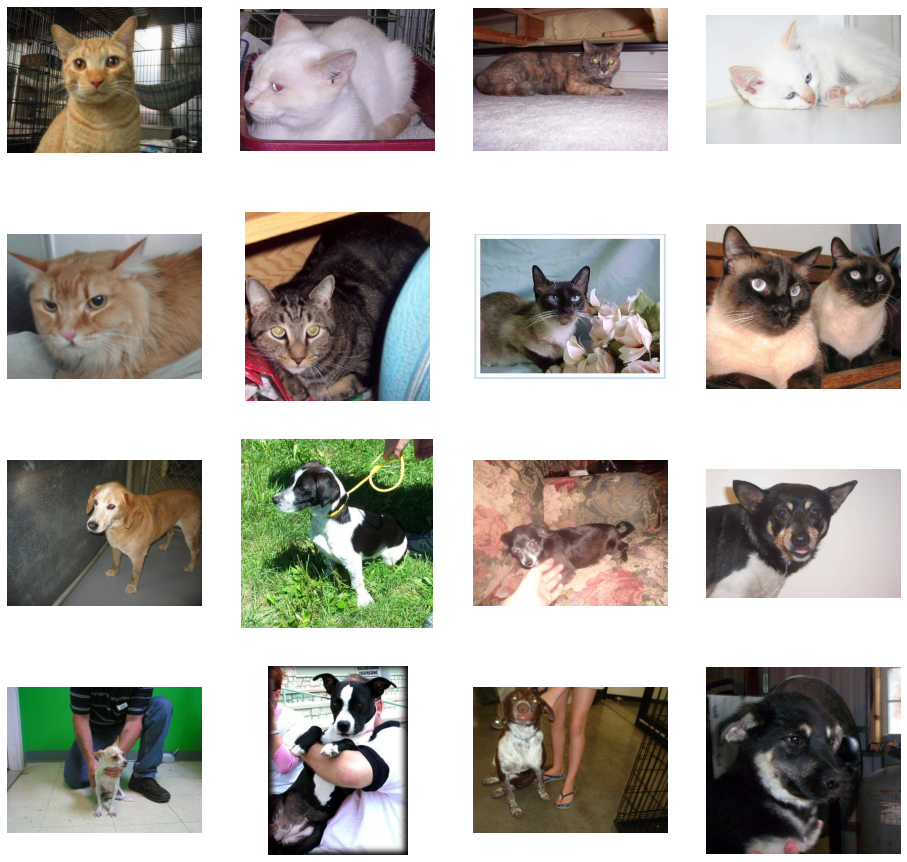

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4
pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)
 for fname in train_cat_fnames[ pic_index-8:pic_index] 
 ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
 for fname in train_dog_fnames[ pic_index-8:pic_index]
 ]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
 sp = plt.subplot(nrows, ncols, i + 1)
 sp.axis('Off') 
 img = mpimg.imread(img_path)
 plt.imshow(img)
plt.show()




Data Preprocessing Step : We are rescaling every image to 150 x150 so that our input images will be uniform to tain and test. 
Batch size is how many pictures to loaded once at each step.
As we are having 2 classes we take binary class mode.
We will do this twice, once for training and other for validation.

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training flow
train_datagen = ImageDataGenerator(rescale = 1.0 /255)
train_generator = train_datagen.flow_from_directory(
               train_dir,
               target_size =(150,150),
               batch_size = 50,
               class_mode = 'binary' )

# Validation flow
validation_datagen = ImageDataGenerator(rescale = 1.0 /255)
validation_generator = validation_datagen.flow_from_directory(
               validation_dir,
               target_size =(150,150),
               batch_size = 20,
               class_mode = 'binary' )

    


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Conovultional Neural Vetwork
we use 3 convolutional layers paired with Max pool layers.
We take 16 ,32 , 64 as Filters for ech layer respectively.
actvation function as relu 
input as 150 x 150 images size with 3 color channels.

For first dense layer we are taking 512 neurons. for output layer, we are taking one class as output . we use sigmoid activation function as it sets 0 for one class and 1 for other.

In [38]:
import tensorflow as tf
from tensorboard.plugins import projector
# Create an embedding layer.
embedding_dim = 16
embedding = tf.keras.layers.Embedding(embedding_dim,output_dim = 3)

model = tf.keras.models.Sequential([
  #embedding,                                  
  tf.keras.layers.Conv2D(16 ,(3,3) , activation = 'relu' , input_shape =(150 ,150 , 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32 ,(3,3) , activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64 ,(3,3) , activation = 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(1, activation='sigmoid') ])

# Displaying Total summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

We are taking Root Mean Square Propogation (RMSprop) optimizer, as it has high learining rate setting to 0.001 and better performance.
We are taking accuracy metrics to know the accuracy of the model.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy' , optimizer=RMSprop(lr= 0.001) , metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


We are traing model using training and validation generators as data sources.
Epoch and validations steps are defined based on performance which is calculated by dividing data by batch size. i.e 80 x 50 = 4000 & 20 x50 = 1000

In [ ]:
from gc import callbacks
history = model.fit(
    train_generator,
    steps_per_epoch = 80,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps =50,
    verbose=2)

Epoch 1/15
80/80 - 1193s - loss: 0.7673 - acc: 0.5670 - val_loss: 0.6420 - val_acc: 0.6690 - 1193s/epoch - 15s/step
Epoch 2/15
80/80 - 103s - loss: 0.6432 - acc: 0.6497 - val_loss: 0.6428 - val_acc: 0.5890 - 103s/epoch - 1s/step
Epoch 3/15
80/80 - 104s - loss: 0.5575 - acc: 0.7188 - val_loss: 0.5612 - val_acc: 0.7200 - 104s/epoch - 1s/step
Epoch 4/15
80/80 - 103s - loss: 0.4842 - acc: 0.7673 - val_loss: 0.6398 - val_acc: 0.6700 - 103s/epoch - 1s/step
Epoch 5/15
80/80 - 104s - loss: 0.4034 - acc: 0.8138 - val_loss: 0.5892 - val_acc: 0.7180 - 104s/epoch - 1s/step
Epoch 6/15
80/80 - 103s - loss: 0.3202 - acc: 0.8627 - val_loss: 0.6205 - val_acc: 0.7280 - 103s/epoch - 1s/step
Epoch 7/15
80/80 - 103s - loss: 0.2482 - acc: 0.8965 - val_loss: 0.5981 - val_acc: 0.7490 - 103s/epoch - 1s/step
Epoch 8/15
80/80 - 104s - loss: 0.1905 - acc: 0.9285 - val_loss: 0.6446 - val_acc: 0.7360 - 104s/epoch - 1s/step
Epoch 9/15
80/80 - 103s - loss: 0.1248 - acc: 0.9592 - val_loss: 0.8736 - val_acc: 0.7250 - 1

In [ ]:
# Set up a logs directory, so Tensorboard knows where to look for files.
log_dir='/content/drive/MyDrive/datasets/dogs-vs-cats/logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save Labels separately on a line-by-line manner.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
  for subwords in encoder.subwords:
    f.write("{}\n".format(subwords))
  # Fill in the rest of the labels with "unknown".
  for unknown in range(1, encoder.vocab_size - len(encoder.subwords)):
    f.write("unknown #{}\n".format(unknown))


# Save the weights we want to analyze as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, here
# we will remove this value.
weights = tf.Variable(model.layers[0].get_weights()[0][1:])
# Create a checkpoint from embedding, the filename and key are the
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Set up config.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`.
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [ ]:
%tensorboard -- log_dir /content/drive/MyDrive/datasets/dogs-vs-cats/logs

Visualizing data

Text(0.5, 1.0, 'Training and validation loss')

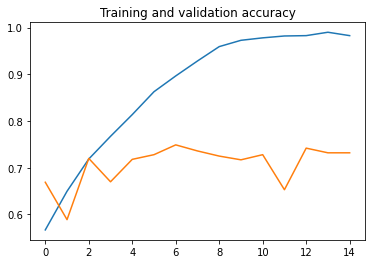

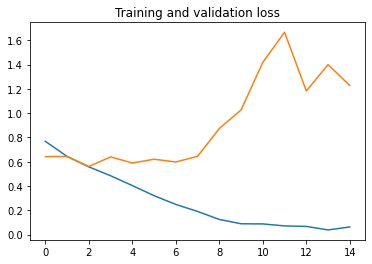

In [40]:
import matplotlib.pyplot as plt

acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) 

plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

Precting Model

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
 # predicting images
 path='/content/' + fn
 img=image.load_img(path, target_size=(150, 150))

 x=image.img_to_array(img)
 x=np.expand_dims(x, axis=0)
 images = np.vstack([x])

 classes = model.predict(images, batch_size=10)

 print(classes[0])

 if classes[0]>0:
  print(fn + " is a dog")

 else:
  print(fn + " is a cat")

Saving cat.jpeg to cat.jpeg
Saving cat2.jpeg to cat2.jpeg
Saving pup.jpeg to pup.jpeg
Saving pup2.jpeg to pup2.jpeg
[0.]
cat.jpeg is a cat
[0.]
cat2.jpeg is a cat
[1.]
pup.jpeg is a dog
[1.]
pup2.jpeg is a dog


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


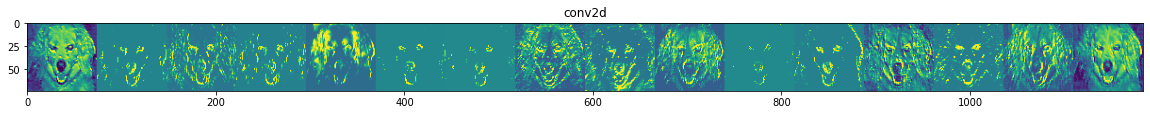

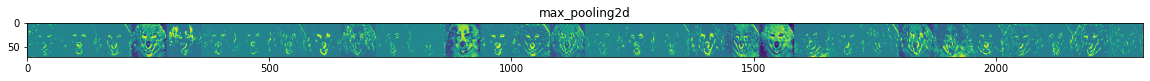

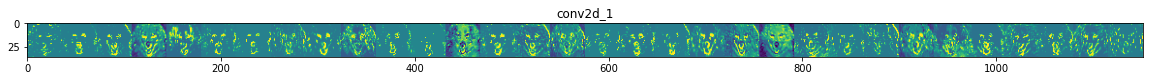

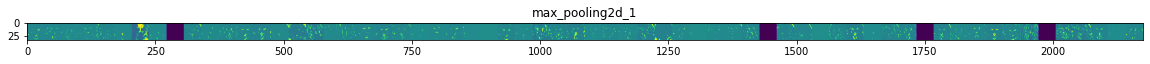

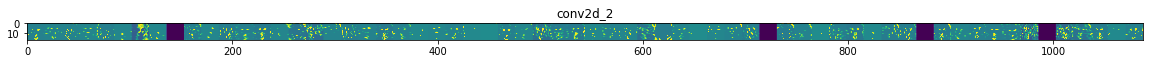

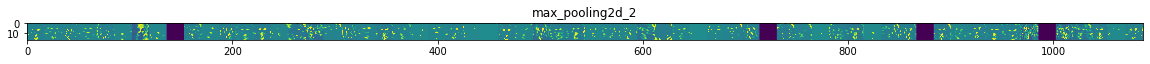

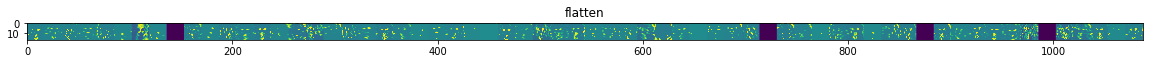

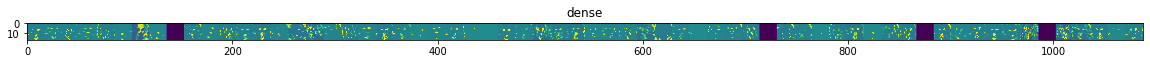

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)
# Rescale by 1/255
x /= 255.0
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

 if len(feature_map.shape) == 4:

 #-------------------------------------------
 # Just do this for the conv / maxpool layers, not the fully-connected layers
 #-------------------------------------------
  n_features = feature_map.shape[-1] # number of features in the feature map
  size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)

 # We will tile our images in this matrix
  display_grid = np.zeros((size, size * n_features))

 #-------------------------------------------------
 # Postprocess the feature to be visually palatable
 #-------------------------------------------------
  for i in range(n_features):
    x = feature_map[0, :, :, i]
    x -= x.mean()
    x /= x.std ()
    x *= 64
    x += 128
    x = np.clip(x, 0, 255).astype('uint8')
    display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
  #-----------------
 # Display the grid
 #-----------------
 scale = 20. / n_features
 plt.figure( figsize=(scale * n_features, scale) )
 plt.title ( layer_name )
 plt.grid ( False )
 plt.imshow( display_grid, aspect='auto', cmap='viridis' )